## Load Lirbraries & Data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('TikTok profiles dataset (Public web data).csv', encoding='MacRoman')

In [26]:
df.columns

Index(['timestamp', 'account_id', 'nickname', 'biography',
       'awg_engagement_rate', 'comment_engagement_rate',
       'like_engagement_rate', 'bio_link', 'is_verified', 'followers',
       'following', 'likes', 'videos_count', 'create_time', 'id', 'top_videos',
       'url', 'profile_pic_url'],
      dtype='object')

## Statistics

In [27]:
# Display basic information about the engagement rate columns
print(df[['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']].describe())

       awg_engagement_rate  comment_engagement_rate  like_engagement_rate
count          1000.000000              1000.000000           1000.000000
mean              0.562932                 0.026569              0.536364
std               3.222055                 0.140016              3.159788
min               0.000091                 0.000000              0.000000
25%               0.012528                 0.000252              0.011791
50%               0.053558                 0.001203              0.049653
75%               0.202409                 0.006157              0.189987
max              63.375000                 2.000000             63.000000


# Relationship Analysis

## Correlation


Correlation between engagement rates and followers:
awg_engagement_rate       -0.026549
comment_engagement_rate   -0.031347
like_engagement_rate      -0.025683
followers                  1.000000
is_verified                0.378664
following                 -0.051997
likes                      0.917610
videos_count               0.245511
Name: followers, dtype: float64


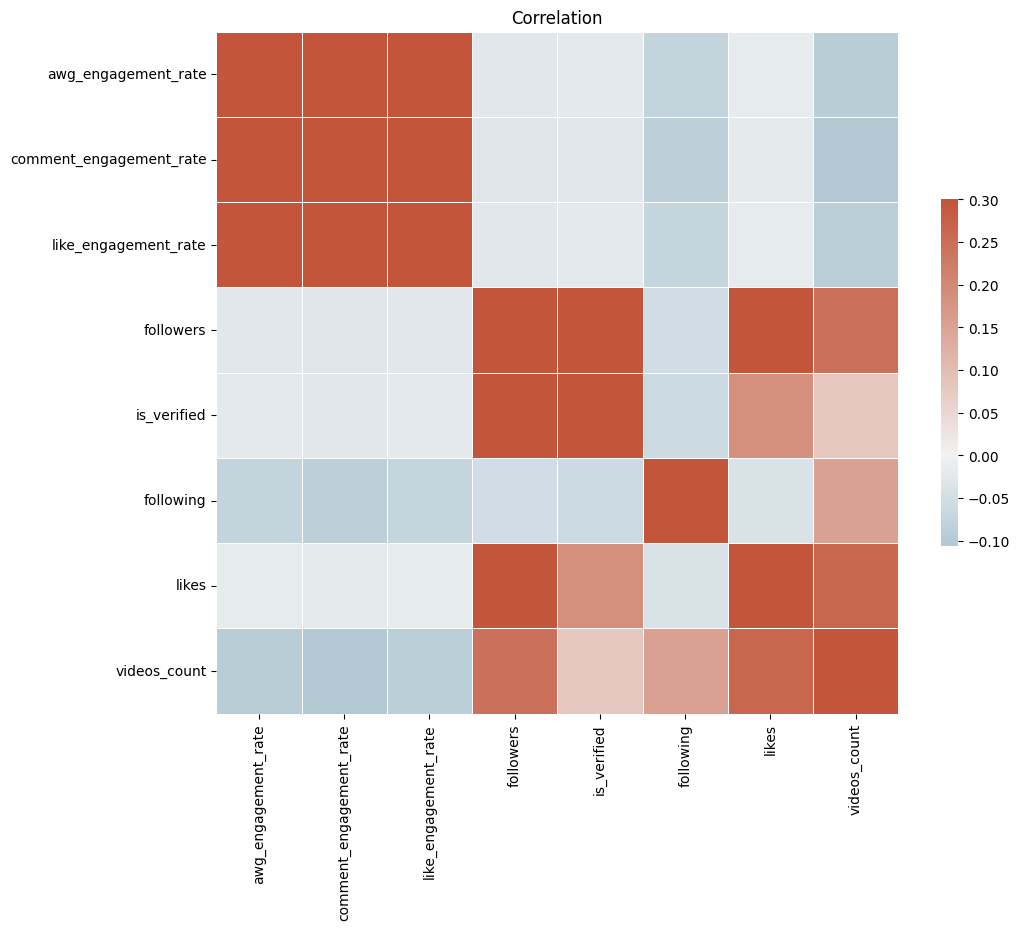

In [28]:
# correlation between engagement rates and followers
correlation = df[['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate', 'followers', 'is_verified','following', 'likes', 'videos_count']].corr()
print("\nCorrelation between engagement rates and followers:")
print(correlation['followers'])

# correlation maps

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(correlation, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation")
plt.show()


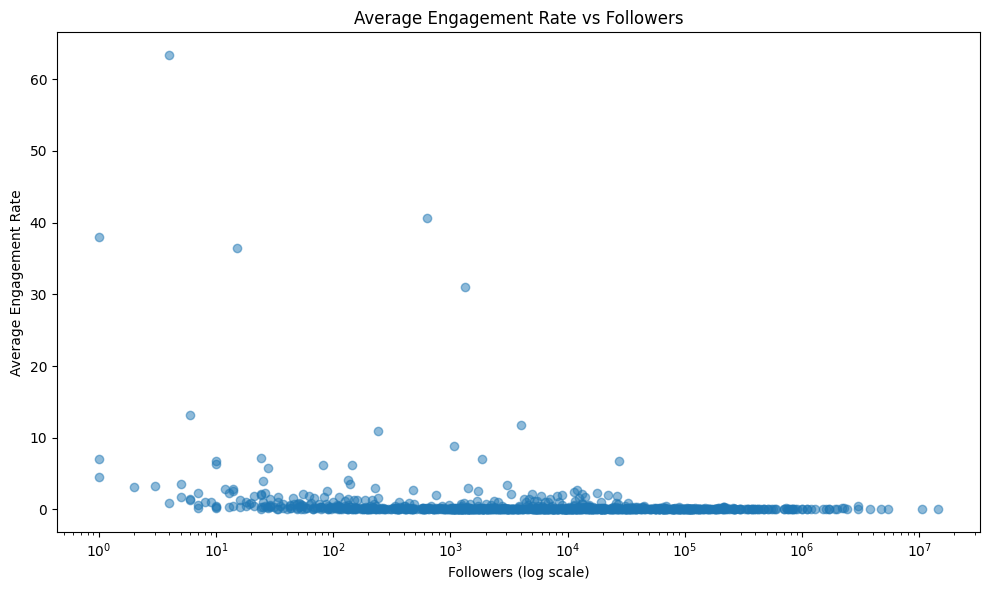

In [29]:
# Create a scatter plot of average engagement rate vs followers
plt.figure(figsize=(10, 6))
plt.scatter(df['followers'], df['awg_engagement_rate'], alpha=0.5)
plt.xscale('log')
plt.xlabel('Followers (log scale)')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate vs Followers')
plt.tight_layout()
plt.show()

## Top influencers

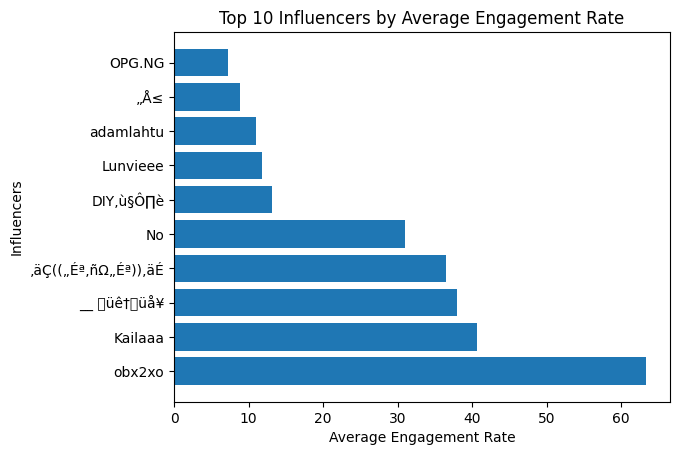

In [30]:
import warnings
warnings.filterwarnings('ignore')
# top 10 influencers by average engagement rate
top_influencers = df.nlargest(10, 'awg_engagement_rate')[['nickname', 'awg_engagement_rate', 'followers']]

fig, ax = plt.subplots()

# Creating the horizontal bar chart
ax.barh(top_influencers['nickname'], top_influencers['awg_engagement_rate'])

# Setting labels and title
ax.set_xlabel('Average Engagement Rate')
ax.set_ylabel('Influencers')
ax.set_title('Top 10 Influencers by Average Engagement Rate')

# Display the plot
plt.show()

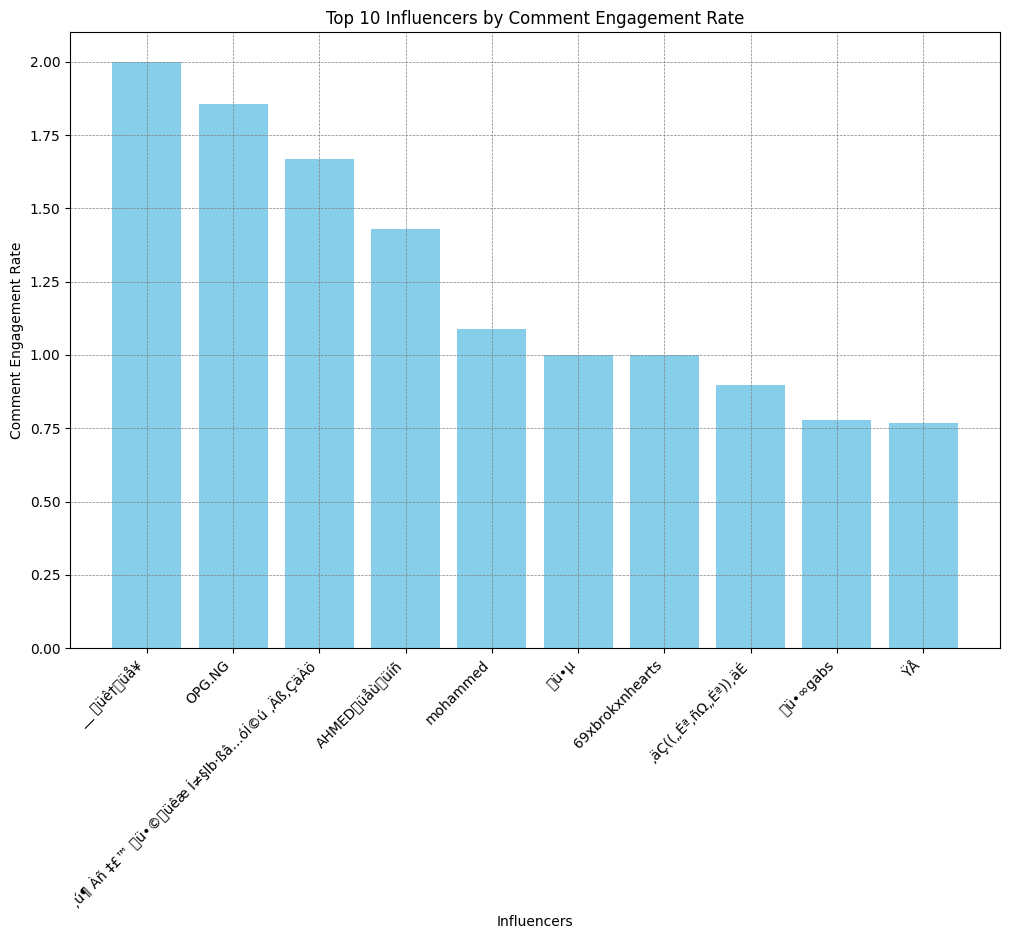

In [31]:
top_influencers = df.nlargest(10, 'comment_engagement_rate')[['nickname', 'comment_engagement_rate', 'followers']]

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

# Create a bar graph
bars = ax.bar(top_influencers['nickname'], top_influencers['comment_engagement_rate'], color='skyblue')

# Setting labels and title
ax.set_xlabel('Influencers')
ax.set_ylabel('Comment Engagement Rate')
ax.set_title('Top 10 Influencers by Comment Engagement Rate')
ax.set_xticklabels(top_influencers['nickname'], rotation=45, ha='right')

# Adding a grid
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

plt.show()

In [32]:
# Calculate average engagement rates for verified vs non-verified accounts
verified_avg = df[df['is_verified']]['awg_engagement_rate'].mean()
non_verified_avg = df[~df['is_verified']]['awg_engagement_rate'].mean()
print(f"\
Average engagement rate for verified accounts: {verified_avg:.4f}")
print(f"Average engagement rate for non-verified accounts: {non_verified_avg:.4f}")

Average engagement rate for verified accounts: 0.0649
Average engagement rate for non-verified accounts: 0.5726


## Followers v/s Following

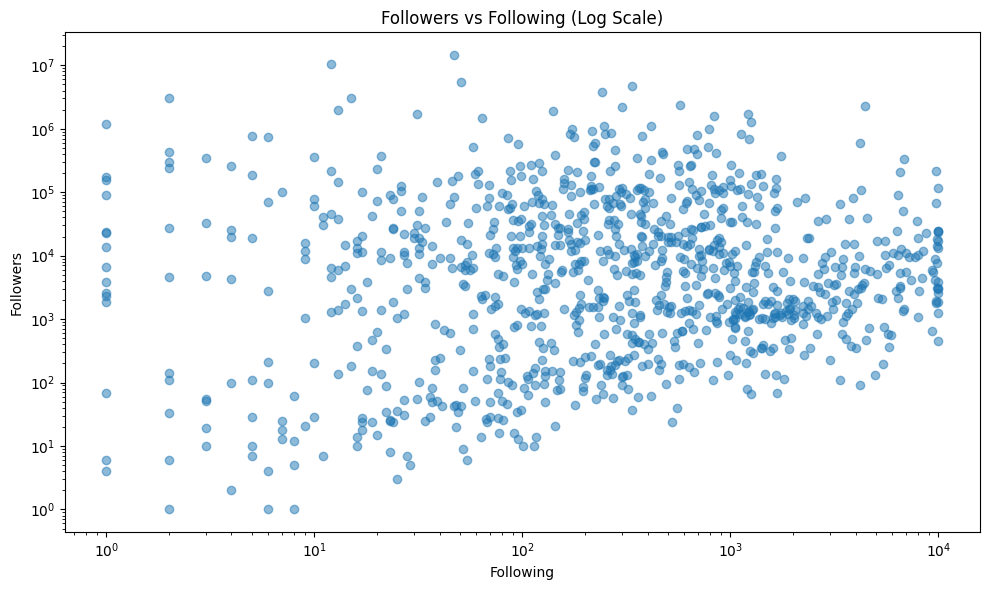

In [33]:
# Calculate follower to following ratio
df['follower_following_ratio'] = df['followers'] / df['following']

# Calculate engagement rate (likes + comments) / followers
df['engagement_rate'] = (df['likes'] + df['videos_count']) / df['followers']

# Create scatter plot of followers vs following
plt.figure(figsize=(10, 6))
plt.scatter(df['following'], df['followers'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Following')
plt.ylabel('Followers')
plt.title('Followers vs Following (Log Scale)')
plt.tight_layout()
plt.show()

## Fake Followers Identification

In [34]:
# Identify potential fake followers
potential_fakes = df[
    (df['follower_following_ratio'] > 1000) |  # Unusually high follower to following ratio
    (df['engagement_rate'] < 0.01) |  # Very low engagement rate
    ((df['followers'] > 100000) & (df['likes'] < 1000))  # High followers but low likes
]

print(f"\
Number of potential fake followers identified: {len(potential_fakes)}")
print("\
Sample of potential fake followers:")
display(potential_fakes[['nickname', 'followers', 'following', 'likes', 'videos_count', 'follower_following_ratio', 'engagement_rate']].head())

Number of potential fake followers identified: 119
Sample of potential fake followers:


,nickname,followers,following,likes,videos_count,follower_following_ratio,engagement_rate
6,Anastasia Ashley,871100,268,9000000,688,3250.373134,10.332554
12,Lauren Wolfe,1000000,786,92300000,1117,1272.264631,92.301117
14,@itshoneydone | Kayla,288400,120,2300000,334,2403.333333,7.976193
16,RYAN-MARK,131900,69,4400000,287,1911.594203,33.360781
34,DIVYA ANGURAL,16000,9,163800,940,1777.777778,10.296250


#  Time Analysis:

## Duration of User Activity

Timestamp statistics:
count                             1000
mean     2023-08-05 15:40:19.199999744
min                2023-07-18 00:00:00
25%                2023-07-30 00:00:00
50%                2023-08-07 00:00:00
75%                2023-08-11 00:00:00
max                2023-08-12 00:00:00
Name: timestamp, dtype: object

Number of unique users: 1000

Number of users with multiple entries: 0

There are no users with multiple entries in the dataset.


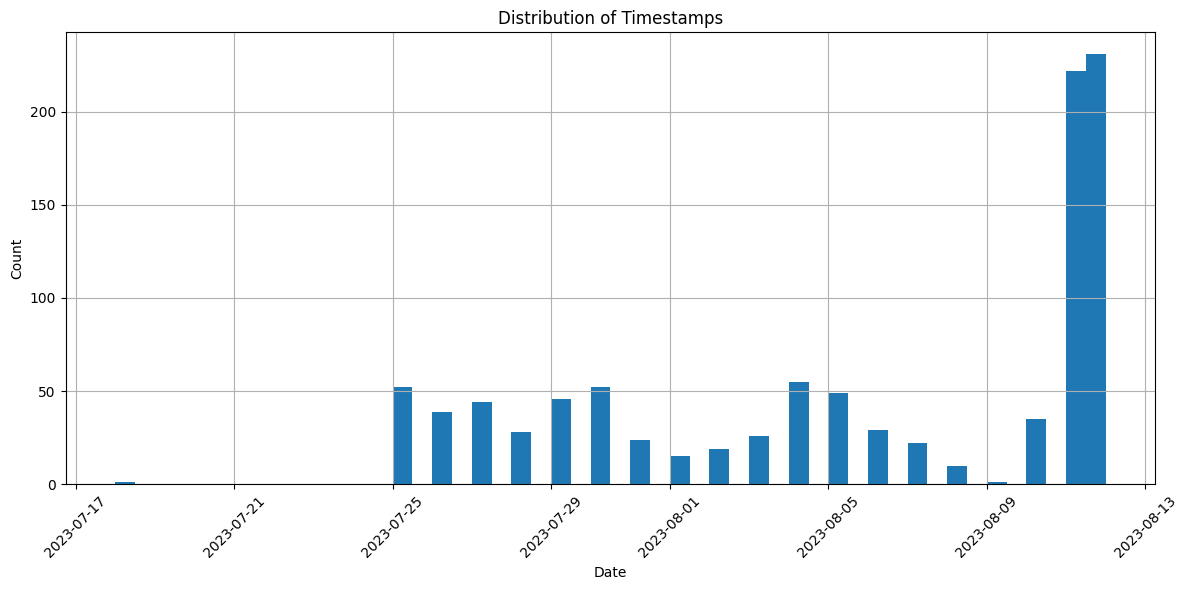

In [35]:
# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Display basic statistics of the timestamp column
print("Timestamp statistics:")
print(df['timestamp'].describe())

# Count the number of unique users
print("\nNumber of unique users: " + str(df['account_id'].nunique()))

# Check if there are any users with multiple entries
users_with_multiple_entries = df['account_id'].value_counts()[df['account_id'].value_counts() > 1]
print("\nNumber of users with multiple entries: " + str(len(users_with_multiple_entries)))

# If there are users with multiple entries, show an example
if len(users_with_multiple_entries) > 0:
    example_user = users_with_multiple_entries.index[0]
    print("\nExample of a user with multiple entries (account_id: " + example_user + "):")
    print(df[df['account_id'] == example_user][['account_id', 'timestamp']].sort_values('timestamp'))
else:
    print("\nThere are no users with multiple entries in the dataset.")

# Show the distribution of timestamps
plt.figure(figsize=(12, 6))
df['timestamp'].hist(bins=50)
plt.title('Distribution of Timestamps')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

-  Higher concentration of data points towards the later part of the collection period (early to mid-August).

# Engagement Rate Prediction


## Model 1: Linear Regression

Mean Squared Error: 294.75101851749815
R-squared: -0.031929055797072836


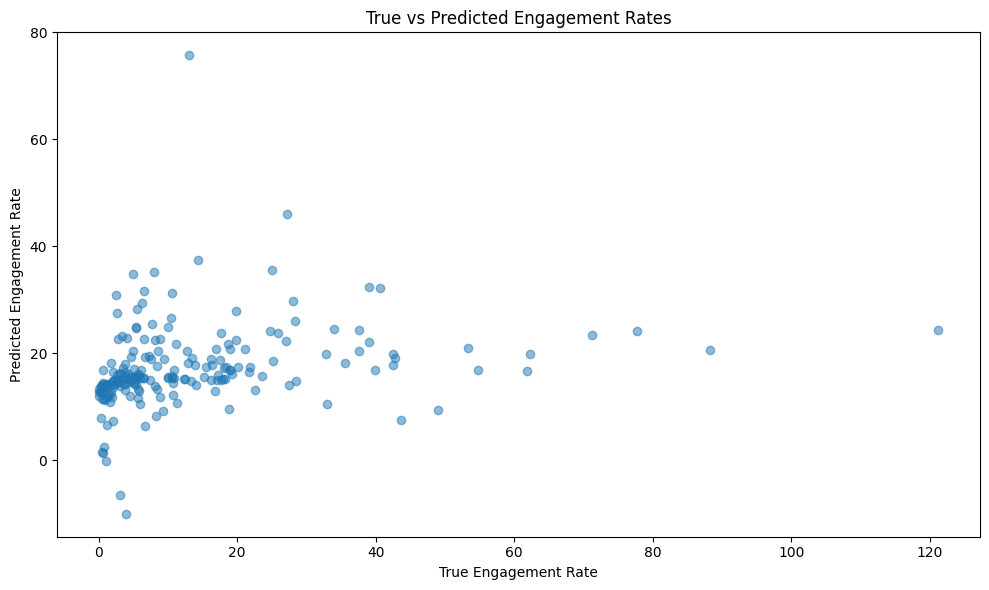

                          Coefficient
followers               -5.804048e-06
following               -1.321681e-03
likes                    1.609309e-07
videos_count             1.205793e-02
awg_engagement_rate     -4.834109e+00
comment_engagement_rate -1.497617e+01
like_engagement_rate     1.014206e+01


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features for predicting engagement rate
features = ['followers', 'following', 'likes', 'videos_count', 'awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']
X = df[features]

# Calculate engagement rate as (likes + videos_count) / followers
y = df['engagement_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Plot the true vs predicted engagement rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('True vs Predicted Engagement Rates')
plt.tight_layout()
plt.show()

# Print the coefficients of the model
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

## Model 2: RandomForestRegressor

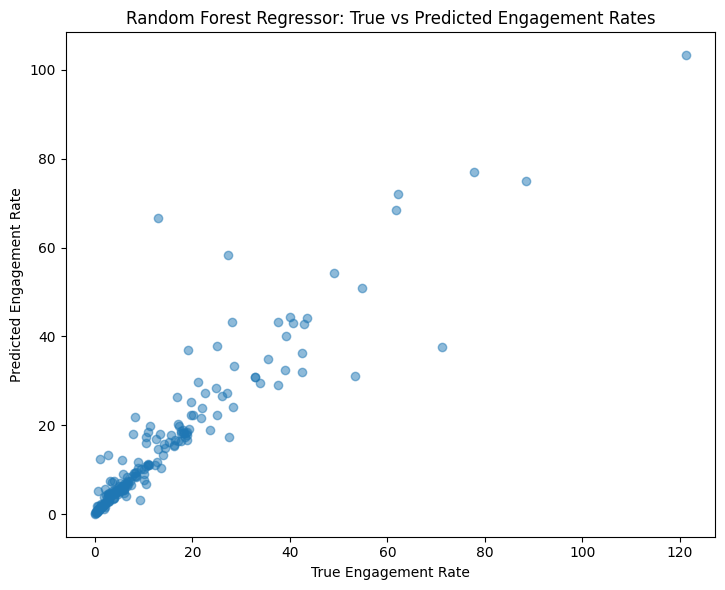

Model Performance Comparison:
    Metric  Random Forest
       MSE      43.783102
      RMSE       6.616880
       MAE       2.966037
        R2       0.846715
CV_R2_mean       0.416236
 CV_R2_std       0.353207


In [37]:
# Import necessary libraries for additional models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV_R2_mean': np.mean(cv_scores),
        'CV_R2_std': np.std(cv_scores),
        'y_pred': y_pred
    }

# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_results = train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test,rf_results['y_pred'], alpha=0.5)
plt.xlabel('True Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Random Forest Regressor: True vs Predicted Engagement Rates')
plt.tight_layout()
plt.show()

results_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2', 'CV_R2_mean', 'CV_R2_std'],
    'Random Forest': [rf_results['MSE'], rf_results['RMSE'], rf_results['MAE'], 
                      rf_results['R2'], rf_results['CV_R2_mean'], rf_results['CV_R2_std']]
})

print("Model Performance Comparison:")
print(results_df.to_string(index=False))

# Feature Importance
rf_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
rf_importance = rf_importance.sort_values('importance', ascending=False)

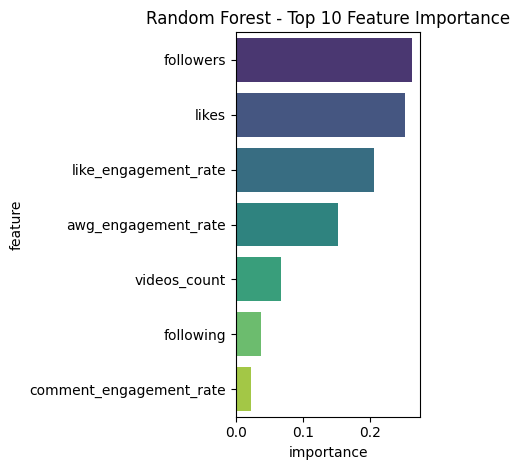

In [38]:
# Feature Importance Plot
plt.subplot(121)
sns.barplot(x='importance', y='feature', data=rf_importance.head(10), palette='viridis')
plt.title('Random Forest - Top 10 Feature Importance')
plt.tight_layout()

Text(0.5, 1.0, 'Random Forest - Residual Plot')

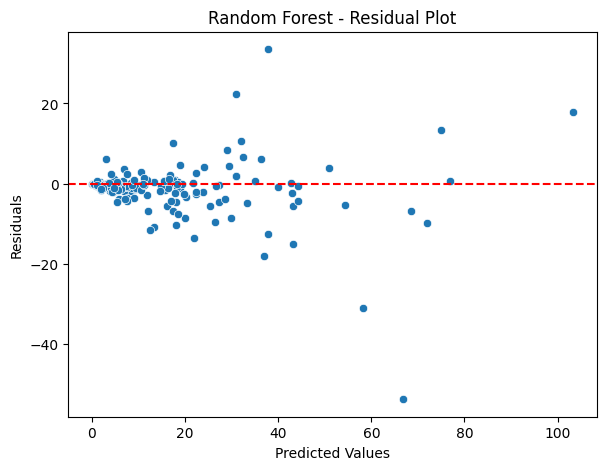

In [39]:

# Residual Plots
plt.figure(figsize=(15, 5))

plt.subplot(121)
residuals_rf = y_test - rf_results['y_pred']
sns.scatterplot(x=rf_results['y_pred'], y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest - Residual Plot')

## Model 3: GradientBoostingRegressor

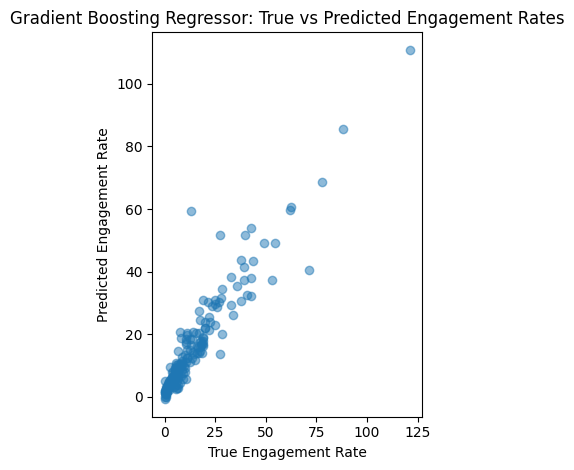

Model Performance Comparison:
 Gradient Boosting
         35.808791
          5.984045
          3.496199
          0.874633
          0.214102
          0.714708


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
# Train and evaluate Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_results = train_and_evaluate_model(gb_model, X_train, X_test, y_train, y_test)


plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_results['y_pred'], alpha=0.5)
plt.xlabel('True Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Gradient Boosting Regressor: True vs Predicted Engagement Rates')
plt.tight_layout()
plt.show()

results_df_gb = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2', 'CV_R2_mean', 'CV_R2_std'],
    'Random Forest': [gb_results['MSE'],gb_results['RMSE'], gb_results['MAE'], 
                      gb_results['R2'], rf_results['CV_R2_mean'], gb_results['CV_R2_std']]
})

print("Model Performance Comparison:")
print(results_df_gb.to_string(index=False))

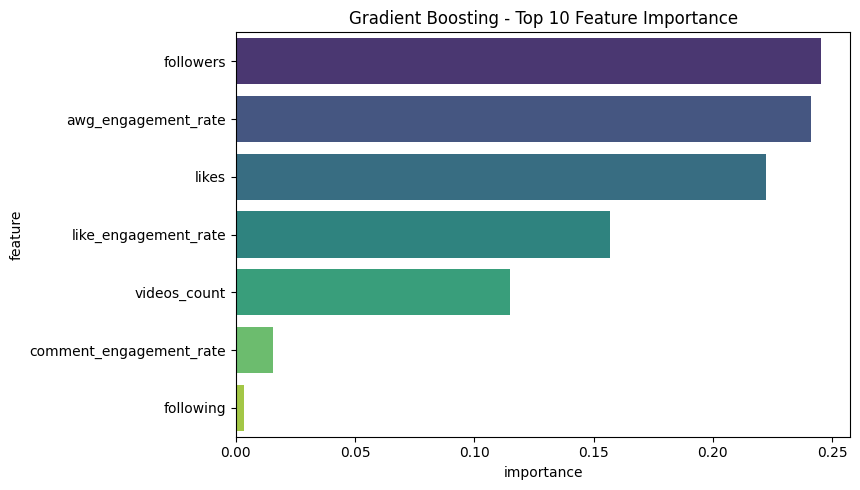

In [41]:
# Feature Importance
gb_importance = pd.DataFrame({'feature': X_train.columns, 'importance': gb_model.feature_importances_})
gb_importance = gb_importance.sort_values('importance', ascending=False)


# Visualizations
plt.figure(figsize=(15, 5))
plt.subplot(122)
sns.barplot(x='importance', y='feature', data=gb_importance.head(10), palette='viridis')
plt.title('Gradient Boosting - Top 10 Feature Importance')
plt.tight_layout()
plt.show()

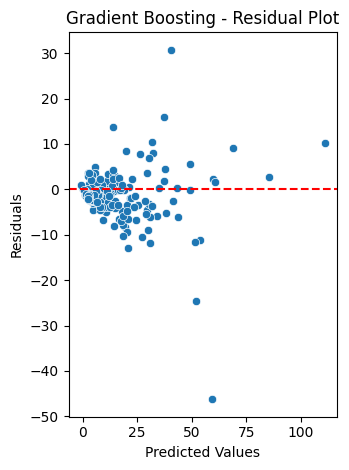

In [42]:
# residual plot
plt.subplot(122)
residuals_gb = y_test - gb_results['y_pred']
sns.scatterplot(x=gb_results['y_pred'], y=residuals_gb)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Gradient Boosting - Residual Plot')
plt.tight_layout()
plt.show()
